# Image Classification

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

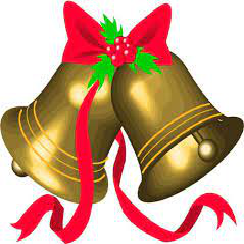

In [ ]:
bell_image_id = os.listdir('/content/drive/MyDrive/SkillClass/Image/bell')[0]
bell_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/bell', bell_image_id)
bell_image = load_image(bell_path)

tf.keras.preprocessing.image.load_img(bell_path, target_size=(244,244))

In [ ]:
print(f'shape: {bell_image.shape}')
print(f'type: {type(bell_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [ ]:
model.predict(bell_image)

1/1 [==============================] - 1s 1s/step


array([[1.45313042e-08, 1.17647062e-07, 5.94962613e-09, 6.04454442e-08,
        8.19465551e-10, 5.88886406e-09, 3.95299848e-10, 5.28299680e-08,
        1.39621763e-08, 1.48304743e-10, 2.20854410e-08, 9.08988440e-09,
        1.04139297e-09, 9.15872711e-10, 3.25192251e-09, 9.94714853e-08,
        4.94823702e-08, 2.55105768e-08, 7.48712559e-09, 9.15294729e-10,
        1.72762746e-08, 4.88185314e-09, 4.03855040e-11, 6.67896349e-10,
        4.54707730e-11, 1.23060522e-08, 1.89527270e-07, 9.75758141e-08,
        9.73247527e-09, 1.89114633e-06, 2.50512517e-08, 4.37670789e-09,
        1.88494766e-07, 2.02400741e-09, 5.47599521e-09, 1.07823652e-08,
        9.04536712e-09, 1.30491511e-08, 2.64386904e-06, 1.25419239e-08,
        1.71771770e-08, 1.23161146e-06, 6.48873524e-08, 7.01007252e-07,
        2.62214712e-07, 1.03374855e-08, 4.76102429e-08, 2.46192656e-07,
        3.47299994e-10, 1.54514040e-10, 5.28099675e-10, 5.52451581e-07,
        5.46080457e-07, 1.26973907e-08, 3.00004821e-09, 5.855467

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(bell_image).shape

1/1 [==============================] - 0s 431ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(5)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillClass/Image', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillClass/Image',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 813 images belonging to 5 classes.
Found 88 images belonging to 5 classes.


In [ ]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/10
25/25 [==============================] - 335s 13s/step - loss: 1.3243 - val_loss: 0.4512
Epoch 2/10
25/25 [==============================] - 62s 2s/step - loss: 0.6428 - val_loss: 0.2739
Epoch 3/10
25/25 [==============================] - 63s 2s/step - loss: 0.4667 - val_loss: 0.2308
Epoch 4/10
25/25 [==============================] - 62s 2s/step - loss: 0.3997 - val_loss: 0.1751
Epoch 5/10
25/25 [==============================] - 61s 2s/step - loss: 0.3284 - val_loss: 0.1881
Epoch 6/10
25/25 [==============================] - 61s 2s/step - loss: 0.2918 - val_loss: 0.0763
Epoch 7/10
25/25 [==============================] - 62s 2s/step - loss: 0.2383 - val_loss: 0.1174
Epoch 8/10
25/25 [==============================] - 63s 2s/step - loss: 0.2242 - val_loss: 0.1097
Epoch 9/10
25/25 [==============================] - 64s 3s/step - loss: 0.2168 - val_loss: 0.1169
Epoch 10/10
25/25 [==============================] - 64s 3s/step - loss: 0.1932 - val_loss: 0.1299


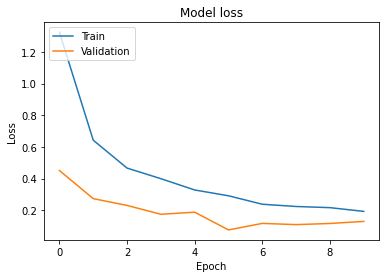

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
random_bell = random.choice(os.listdir('/content/drive/MyDrive/SkillClass/Image/bell'))
bell_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/bell',random_bell)
bell = load_image(bell_path)
random_gingerbread = random.choice(os.listdir('/content/drive/MyDrive/SkillClass/Image/gingerbread'))
gingerbread_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/gingerbread',random_gingerbread)
gingerbread = load_image(gingerbread_path)
random_santa = random.choice(os.listdir('/content/drive/MyDrive/SkillClass/Image/santa'))
santa_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/santa', random_santa)
santa = load_image(santa_path)
random_snowman = random.choice(os.listdir('/content/drive/MyDrive/SkillClass/Image/snowman'))
snowman_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/snowman', random_snowman)
snowman = load_image(snowman_path)
random_xmastree = random.choice(os.listdir('/content/drive/MyDrive/SkillClass/Image/xmastree'))
xmastree_path = os.path.join('/content/drive/MyDrive/SkillClass/Image/xmastree', random_xmastree)
xmastree = load_image(xmastree_path)

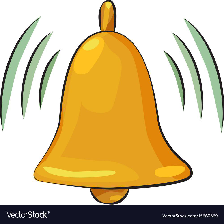

In [ ]:
tf.keras.preprocessing.image.load_img(bell_path, target_size=(224,224))

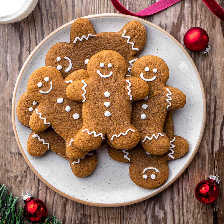

In [ ]:
tf.keras.preprocessing.image.load_img(gingerbread_path, target_size=(224,224))

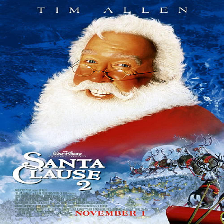

In [ ]:
tf.keras.preprocessing.image.load_img(santa_path, target_size=(224,224))

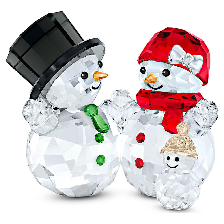

In [ ]:
tf.keras.preprocessing.image.load_img(snowman_path, target_size=(224,224))

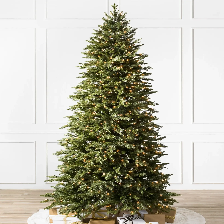

In [ ]:
tf.keras.preprocessing.image.load_img(xmastree_path, target_size=(224,224))

In [ ]:
print(f'''bell:{np.round(model.predict(bell),2)}''')

1/1 [==============================] - 0s 482ms/step
bell:[[1. 0. 0. 0. 0.]]


In [ ]:
print(f'''gingerbread:{np.round(model.predict(gingerbread),2)}''')

1/1 [==============================] - 0s 56ms/step
gingerbread:[[0. 1. 0. 0. 0.]]


In [ ]:
print(f'''santa:{np.round(model.predict(santa),2)}''')

1/1 [==============================] - 0s 56ms/step
santa:[[0.   0.   0.97 0.02 0.  ]]


In [ ]:
print(f'''snowman:{np.round(model.predict(snowman),2)}''')

1/1 [==============================] - 0s 58ms/step
snowman:[[0.02 0.02 0.01 0.95 0.  ]]


In [ ]:
print(f'''xmastree:{np.round(model.predict(xmastree),2)}''')

1/1 [==============================] - 0s 57ms/step
xmastree:[[0. 0. 0. 0. 1.]]


In [ ]:
christmas_path = '/content/drive/MyDrive/SkillClass/Image/christmastree.jpg'
christmas = load_image(christmas_path)

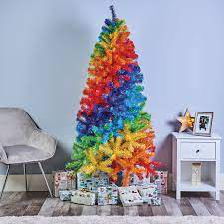

In [ ]:
tf.keras.preprocessing.image.load_img(christmas_path, target_size=(224,224))

In [ ]:
print(f'''christmas:{np.round(model.predict(christmas),2)}''')

1/1 [==============================] - 0s 60ms/step
christmas:[[0.   0.   0.02 0.02 0.95]]
